## HW03 Code


You will complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/summer2021/cs135).

### Import required libraries.

In [1]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
import sklearn.calibration

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

### Function for later use
This function will compute and return a confusion matrix on data, given probabilistic predictions, and a threshold to use when converting probabilities to "firm" predictions.

***Don't change this function.***

In [2]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

## Cancer-Risk Screening

### 1: Compute true/false positives/negatives.

Complete the following code.

In [3]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    
    for i, j in zip(ytrue_N, yhat_N):
        if (i == 1) & (j == 1):
            TP += 1
        elif (i == 0) & (j == 0):
            TN += 1
        elif (i == 0) & (j == 1):
            FP += 1
        else:
            FN += 1
    
#     length = len(ytrue_N)
#     TP /= length
#     TN /= length
#     FP /= length
#     FN /= length
    
    return TP, TN, FP, FN

#### Testing code
The following four calls to the function above test your results.  ***Don't modify this.***

In [4]:
all0 = np.zeros(10)
all1 = np.ones(10)
calc_TP_TN_FP_FN(all0, all1)

(0.0, 0.0, 10.0, 0.0)

In [5]:
calc_TP_TN_FP_FN(all1, all0)

(0.0, 0.0, 0.0, 10.0)

In [6]:
calc_TP_TN_FP_FN(all1, all1)

(10.0, 0.0, 0.0, 0.0)

In [7]:
calc_TP_TN_FP_FN(all0, all0)

(0.0, 10.0, 0.0, 0.0)

### Load the dataset.

The following should ***not*** be modified.  After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [8]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_cancer/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_cancer/y_test.csv', delimiter=',', skiprows=1)

### 2: Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [9]:
print("Fraction of data that has_cancer on TRAIN: %.3f"  % np.mean(y_train)) #TODO: modify these prints
print("fraction of data that has_cancer on TEST : %.3f" % np.mean(y_test))

Fraction of data that has_cancer on TRAIN: 0.140
fraction of data that has_cancer on TEST : 0.139


### 3: The predict-0-always baseline

#### (a) Compute the accuracy of the always-0 classifier.

Complete the code to compute and print the accuracy of the always-0 classifier on validation and test outputs.

In [10]:
print("acc on TRAIN: %.3f" % (1-np.mean(y_train))) #TODO: modify these values
print("acc on TEST : %.3f" % (1-np.mean(y_test)))

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (b) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [11]:
# TODO: call print(calc_confusion_matrix_for_threshold(...))
calc_confusion_matrix_for_threshold(y_test, np.zeros(len(y_test)))

Predicted,0,1
True,,
0,155,0
1,25,0


#### (c) Reflect on the accuracy of the always-0 classifier.

**Answer**: Based on the observation, the accuracy is fine, and we can know there is 155 true negative, which is good. However, there is still 25 false negative, which means that there are 25 patients have the cancer, but the model did not find it, which means that they may miss the chance to do the biopsies. This is terrible, which is why we cannot use it on the task. 

#### (d) Analyze the various costs of using the always-0 classifier.


**Answer**: Using always-0 classifier, the model just have too many false negative, which means that too many people will miss the treatment.
We rather have false positive than the false negative. This is because for false positive, we can let more healthy people to get treatment, which can cause less harm. In this task, using always-0 calssifier can delay patients' time for treatment, also will make the patients cost more for their illness. 

### 4: Basic Perceptron Models

#### (a) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron


scaler = MinMaxScaler()

x_train_transform = scaler.fit_transform(x_train)
x_test_transform = scaler.transform(x_test)
perceptron = Perceptron()
perceptron.fit(x_train_transform, y_train)


y_train_predict = perceptron.predict(x_train_transform)
y_test_predict = perceptron.predict(x_test_transform)


print("acc on TRAIN: %.3f" % accuracy_score(y_train, y_train_predict)) #TODO: modify these values
print("acc on TEST : %.3f" % accuracy_score(y_test, y_test_predict))

print(calc_confusion_matrix_for_threshold(y_test, y_test_predict))



# TODO: call print(calc_confusion_matrix_for_threshold(...))

acc on TRAIN: 0.402
acc on TEST : 0.494
Predicted   0   1
True             
0          64  91
1           0  25


#### (b) Compare the `Perceptron` to the always-0 classifier.

**Answer**: 
Perceptron does not have the false negative, which means that we will not miss the treatment for the patients who have the illness. In addition, Perceptron have 91 false positive, which gives treatments to some patients who do not have the cancer.
In comparision to the always-0 classifier, the Perceptron will not miss the patients who have the cancer.

#### (c) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

train_accuracy_list = list()
test_accuracy_list = list()
perceptron = Perceptron()

alphas = np.logspace(-5, 5, base=10, num=100)
scaler = MinMaxScaler()
x_train_transform = scaler.fit_transform(x_train)
x_test_transform = scaler.transform(x_test)

for element in alphas:
    p = Perceptron(penalty="L2", alpha=element)
    p.fit(x_train_transform, y_train)

    
    train_accuracy_list.append(p.score(x_train_transform, y_train))
    test_accuracy_list.append(p.score(x_test_transform, y_test))




# TODO: create, fit models here and record accuracy of each

##### Plot accuracy on train/test data across the different alpha values.

Text(0, 0.5, 'accuracy')

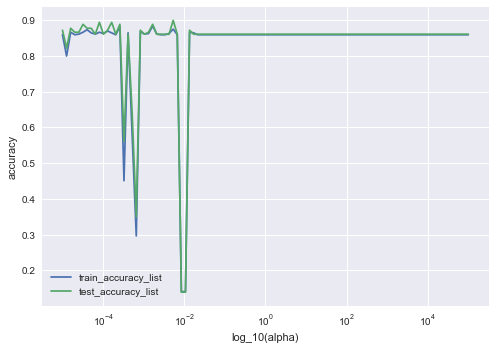

In [14]:
# TODO make plot

plt.plot(alphas, train_accuracy_list, label = 'train_accuracy_list')
plt.plot(alphas, test_accuracy_list, label = 'test_accuracy_list')
plt.xscale("log")
plt.legend()
plt.xlabel("log_10(alpha)")
plt.ylabel("accuracy")
# TODO add legend, titles, etc.
# plt.legend(...);

#### (d) Discuss what the plot is showing you.

**Answer**: For this time, we actually care little about the accuracy because it is very noisy unlike the last time. Last time's graph, the error seems very stable and it is changing very slowly. So we can accurately predict which strength is the best. However, this time's garph, it changes really fast, like at 10 to the -2, the accuracy is only 0.2, which makes us doubt about the result. Furthermore, we can just see the accuracy, and it is 0.9 at most of the time. However, even the all-0 classfier can have a 0.9 accuracy. So what we care more will be how about true negative or false positive, which the graph this time did not provide. 
    In conclusion, the regularized perceptron model is not so useful. 

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves. 

In [15]:
# TODO: fit a Perceptron and generate its decision_function() over the test data.

# TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator, 
#       and generate its probabilistic predictions over the test data.

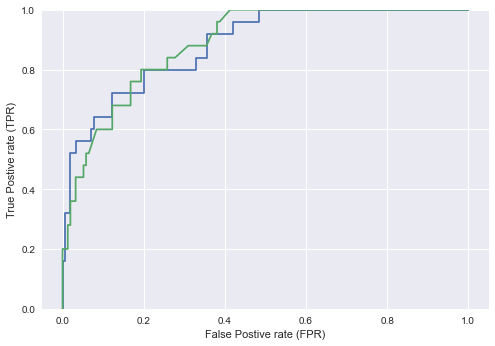

In [16]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron


perceptron = Perceptron()
perceptron.fit(x_train_transform, y_train)
perceptron_decision = perceptron.decision_function(x_test_transform)


calibrated = sklearn.calibration.CalibratedClassifierCV(base_estimator=perceptron, method='isotonic')
calibrated.fit(x_train_transform, y_train)
calibrated_proba = calibrated.predict_proba(x_test_transform)[:, 1]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, perceptron_decision)
fpr1, tpr1, thresholds1 = sklearn.metrics.roc_curve(y_test, calibrated_proba)

plt.plot(fpr, tpr, label='Decision function version')
plt.plot(fpr1, tpr1, label='calibrated function version')


plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR)");
plt.ylabel("True Postive rate (TPR)");

In [17]:
print("AUC on TEST for Perceptron: %.3f" % sklearn.metrics.roc_auc_score(y_test, perceptron_decision)) #TODO: modify these values
print("AUC on TEST for probabilistic model: %.3f" % sklearn.metrics.roc_auc_score(y_test, calibrated_proba))

AUC on TEST for Perceptron: 0.884
AUC on TEST for probabilistic model: 0.886


#### (b) Discuss the results above

**Answer**: These two graphs are all increase their TPR as their FPR grows, and their trends looks very similar. 
we want the false positive rate as low as it can when the true positive rate becomes 1.
Perceptron initially have a higher TRP than the CalibratedClassifierCV when they have the same FPR. However, then perceptron have a lower TRP than the CalibratedClassifierCV when they have the same FPR. Finally, when the TPR both reach to 1, CalibratedClassifierCV's FPR is 0.4 and Perceptron is around 0.5, which is their difference. 
Overall, I prefer the CalibratedClassifierCV because it finally have a low FPR when the TPR becomes , which is better for the patients to avoid them of suffering unneccessary treatment. 

#### (c) Compute model metrics for different probabilistic thresholds

Complete the function that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

In [18]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    acc : accuracy of predictions
    tpr : true positive rate of predictions
    tnr : true negative rate of predictions
    ppv : positive predictive value of predictions
    npv : negative predictive value of predictions
    '''

    # TODO: fix this
    
    tp, tn, fp, fn = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    total = tp + tn + fp + fn
    
    acc = (tp + tn) / total
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    return acc, tpr, tnr, ppv, npv

# You can use this function later to make printing results easier; don't change it.
def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true postive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [19]:
# TODO: test different thresholds to compute these values
thresholds = np.linspace(0, 1.001, 51)

best_TPR = 0
best_PPV = 0
for t in thresholds:
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, calibrated_proba, t)
    
    if best_TPR < tpr:
        best_TPR = tpr
        best_PPV_for_best_TPR = ppv
        best_TPR_threshold = t
    elif best_TPR == tpr and best_PPV_for_best_TPR < ppv:
        best_PPV_for_best_TPR = ppv
        best_TPR_threshold = t
            

    if best_PPV < ppv:
        best_PPV = ppv
        best_TPR_for_best_PPV = tpr
        best_PPV_threshold = t
    elif best_PPV == ppv and best_TPR_for_best_PPV < tpr:
        best_PPV_for_best_TPR = ppv
        best_TPR_threshold = t


In [20]:
print("TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

TPR threshold: 0.0601 => TPR: 1.0000; PPV: 0.2778
PPV threshold: 0.6206 => PPV: 1.0000; TPR: 0.2000


#### (e) Exploring diffrerent thresholds

#### (i) Using default 0.5 threshold. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [21]:
best_thr = 0.5


print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")

print(calc_confusion_matrix_for_threshold(y_test, calibrated_proba, best_thr))
print("")
print_perf_metrics_for_threshold(y_test, calibrated_proba, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Predicted    0   1
True              
0          150   5
1           15  10

0.889 ACC
0.400 TPR
0.968 TNR
0.667 PPV
0.909 NPV


#### (ii) Using threshold with highest TPR. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [22]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")

print(calc_confusion_matrix_for_threshold(y_test, calibrated_proba, best_thr))
print("")
print_perf_metrics_for_threshold(y_test, calibrated_proba, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.0601

Predicted   0   1
True             
0          90  65
1           0  25

0.639 ACC
1.000 TPR
0.581 TNR
0.278 PPV
1.000 NPV


#### (iii) Using threshold with highest PPV. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [23]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")

print(calc_confusion_matrix_for_threshold(y_test, calibrated_proba, best_thr))
print("")
print_perf_metrics_for_threshold(y_test, calibrated_proba, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.6206

Predicted    0  1
True             
0          155  0
1           20  5

0.889 ACC
0.200 TPR
1.000 TNR
1.000 PPV
0.886 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: at (a) when we set threshold to be 0.5, the true negative is relative high, and the false positive and false negative is relatively low. Therefore, it is overall have a average performance. 

at (b) when we use the best_TPR_threshold, the false negative is 0, which is good at this situation. false negative means that we predict this person does not have cancer, however, this person has a cancer, which means that this person will miss the treatment. In the case, the false negative is 0, which is good.

at (c) when we use the best_PPV_threshold, the false positive is 0. this means that we predict this guy has cancer, however, this person is healthy. This model is not fit for checking the illness because it hass false negative, which may let ill patients miss the treatment. However, this value of threshold may be used in the situation that we can make sure that we can miss some people, however, the people we treat must be a subset of our target people. For example, a star wants to give his fans signatures. Maybe some fan cannot receive the signature, however, this star will not send his signature to a person who is not his fan. 